<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/taca/blob/main/ref/geron/chap_2/5_prepare_for_algorithms/1_prepare_for_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/taca/blob/main/ref/geron/chap_2/5_prepare_for_algorithms/1_prepare_for_algorithms.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Prepare the Data for Machine Learning Algorithms

Página 101 de Geron


### [Primer video de apoyo](https://www.youtube.com/watch?v=NRJ4tLPW6-Q)  

### [Segundo video de apoyo para la lectura de este cuaderno](https://www.youtube.com/watch?v=RsSjZ-cXvwg)

In [1]:
import numpy as np 
import pandas as pd 

In [3]:
url = 'https://raw.githubusercontent.com/marco-canas/taca/main/datasets/housing/housing.csv'
housing = pd.read_csv(url) 

In [4]:
housing.head(n = 10) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf], # definición de los intervalos de clase o de agrupación de datos
labels=[1, 2, 3, 4, 5])

In [6]:
housing.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

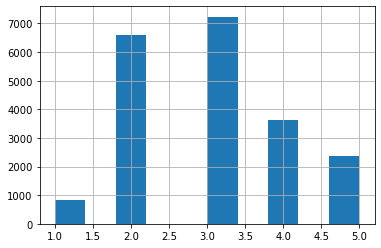

In [7]:
housing["income_cat"].hist()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit


In [9]:
muestra_estrat = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, 
                                        random_state = 513)

In [10]:
for train_index, test_index in muestra_estrat.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

## Gráfica de verificación del muestreo estratificado 

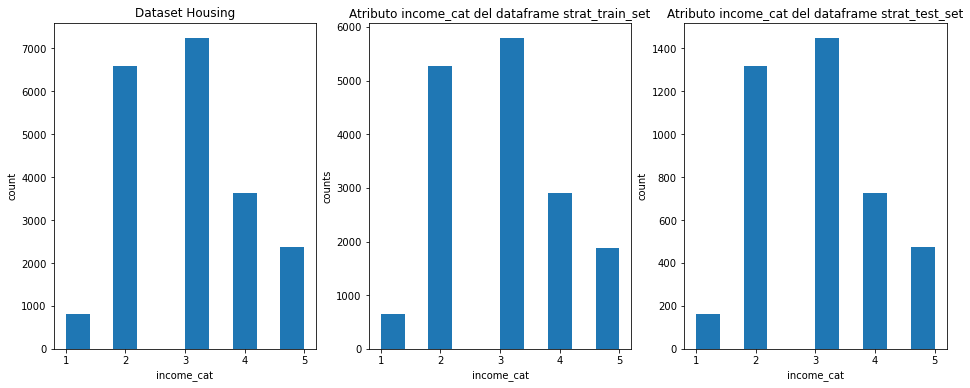

In [20]:
import numpy as np 
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (16,6))

ax1 = fig.add_subplot(131) 

url = 'https://raw.githubusercontent.com/marco-canas/taca/main/datasets/housing/housing.csv'
housing = pd.read_csv(url) 

housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf], # definición de los intervalos de clase o de agrupación de datos
labels=[1, 2, 3, 4, 5])

from sklearn.model_selection import StratifiedShuffleSplit

muestra_estrat = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, 
                                        random_state = 513)


for train_index, test_index in muestra_estrat.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

ax1.hist(housing["income_cat"])
ax1.set(title = 'Dataset Housing' , xlabel = 'income_cat' , ylabel = 'count')

ax2 = fig.add_subplot(132) 
ax2.hist(strat_train_set['income_cat'])
ax2.set(title = 'Atributo income_cat del dataframe strat_train_set' , xlabel = 'income_cat' , ylabel ='counts' )

ax3 = fig.add_subplot(133) 
ax3.hist(strat_test_set['income_cat'])
ax3.set(title = 'Atributo income_cat del dataframe strat_test_set' , xlabel = 'income_cat' , ylabel ='count' )

plt.savefig('exito_en_muestreo_estratificado.jpg')

plt.show() 

## Y Ahora eliminemos el atributo `Income_cat`

In [13]:
for set_ in (strat_train_set, strat_test_set): # un ciclo for para moverse por una tupla
    set_.drop("income_cat", axis=1, inplace=True)

Es hora de preparar los datos para sus algoritmos de aprendizaje automático. 

En lugar de hacerlo manualmente, debe escribir funciones para este propósito, por varias buenas razones:

* Esto te permitirá reproducir estas transformaciones fácilmente en cualquier conjunto de datos por ejemplo la próxima vez que obtenga un conjunto de datos nuevo. 

* Poco a poco, creará una biblioteca de funciones de transformación que podrá reutilizar en proyectos futuros.

* Puede usar estas funciones en su sistema en vivo para transformar los nuevos datos antes de  
  alimentarlos a sus algoritmos.

* Esto le permitirá probar fácilmente varias transformaciones y ver qué combinación de   
  transformaciones funciona mejor.

Pero primero volvamos a un conjunto de entrenamiento limpio (copiando `strat_train_set` una vez más).

También separemos los predictores y las etiquetas, ya que no necesariamente queremos aplicar las mismas transformaciones a los predictores y los valores objetivo (tenga en cuenta que `drop()` crea una copia de los datos y no afecta a `strat_train_set`):

In [16]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning  
Página 101 de Géron

## Las funciones utilizadas en este cuaderno

* `pandas.cut(serie, bins = , labels)`  
* `sklearn.model_selection`
* `StratifiedShuffleSplit`
* `pandas.drop(DataFrame['columna'], axis = 1)`
* `.copy()`: Método asociado a Pandas.
* `.hist()`

## Referentes  

* Géron, Aurélien, Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts,  
  tools, and techniques to build intelligent systems, (2019), O'Reilly Media. 

* Documentación sobre la clase StratifiedShaffleSplit: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
